<a href="https://colab.research.google.com/github/Kedarnath2605/Kedarnath2605/blob/main/Supply_Chain_Performance_and_Bottleneck_Analysis_in_Last_Mile_Delivery_Using_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the Dataset
import pandas as pd

df = pd.read_csv("/content/sample_data/amazon_delivery.csv.zip")

In [ ]:
#Check Dataset Structure
df.shape
df.columns


Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [ ]:
#Identify Data Types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [ ]:
#Check Data Quality (High-Level)
df.isnull().sum()


,0
Order_ID,0
Agent_Age,0
Agent_Rating,54
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


In [ ]:
#Handling Missing Values
df.isnull().sum()


,0
Order_ID,0
Agent_Age,0
Agent_Rating,54
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


In [ ]:
df = df.dropna(subset=['Order_Date'])

In [ ]:
#Remove Duplicate Records
df = df.drop_duplicates()


In [ ]:
#Data Type Standardization
#Convert Date Columns
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [ ]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

df['Distance'] = df.apply(lambda row: haversine_distance(
    row['Store_Latitude'], row['Store_Longitude'],
    row['Drop_Latitude'], row['Drop_Longitude']), axis=1)
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

In [ ]:
df.describe()


,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Delivery_Time,Distance
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,2022-03-13 15:58:10.697089792,124.905645,38.561752
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,10.000000,1.465067
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,2022-03-04 00:00:00,90.000000,4.663432
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,2022-03-15 00:00:00,125.000000,9.220450
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,2022-03-27 00:00:00,160.000000,13.682379
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,270.000000,19692.674606
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,NaN,51.915451,534.564299


In [ ]:
#Create Delivery Lead Time
df['Lead_Time'] = df['Delivery_Time'] / (24 * 60)

In [ ]:
#Create Delay Flag
expected_days = 1 # Define what constitutes an 'on time' delivery (e.g., 1 day)
df['Delay_Flag'] = df['Lead_Time'].apply(lambda x: 'Delayed' if x > expected_days else 'On Time')

In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43739 non-null  object        
 1   Agent_Age        43739 non-null  int64         
 2   Agent_Rating     43685 non-null  float64       
 3   Store_Latitude   43739 non-null  float64       
 4   Store_Longitude  43739 non-null  float64       
 5   Drop_Latitude    43739 non-null  float64       
 6   Drop_Longitude   43739 non-null  float64       
 7   Order_Date       43739 non-null  datetime64[ns]
 8   Order_Time       43739 non-null  object        
 9   Pickup_Time      43739 non-null  object        
 10  Weather          43648 non-null  object        
 11  Traffic          43739 non-null  object        
 12  Vehicle          43739 non-null  object        
 13  Area             43739 non-null  object        
 14  Delivery_Time    43739 non-null  int64

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance,Lead_Time,Delay_Flag
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,0.083333,On Time
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,0.114583,On Time
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,0.090278,On Time
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,0.072917,On Time
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,0.104167,On Time


In [ ]:
#Total Number of Orders
total_orders = df.shape[0]


In [ ]:
#Average Delivery Lead Time
avg_lead_time = df['Lead_Time'].mean()


In [ ]:
#On-Time Delivery Percentage (OTD %)
on_time_deliveries = df[df['Delay_Flag'] == 'On Time'].shape[0]
otd_percentage = (on_time_deliveries / total_orders) * 100

In [ ]:
#Delay Rate
delay_rate = 100 - otd_percentage


In [ ]:
#Warehouse Performance
warehouse_perf = df.groupby('Area')['Lead_Time'].mean()

In [ ]:
#Vehicle Type Performance
vehicle_perf = df.groupby('Vehicle')['Lead_Time'].mean()

In [ ]:
#Distance-Based Performance
df['Distance_Category'] = pd.qcut(df['Distance'], q=5, labels=False, duplicates='drop')
distance_perf = df.groupby('Distance_Category')['Lead_Time'].mean()

In [ ]:
#Supply Chain Performance Measurement
#Lead Time Decomposition
df.groupby('Area')['Lead_Time'].mean().sort_values(ascending=False)

,Lead_Time
Area,
Semi-Urban,0.165662
Metropolitian,0.090071
Urban,0.075996
Other,0.072545


In [ ]:
#2️⃣ Delay Frequency Analysis
df[df['Delay_Flag']=='Delayed'].groupby('Area').size()

,0
Area,


In [ ]:
#3️ Distance-Based Bottleneck Analysis
df.groupby('Distance_Category')['Delay_Flag'].value_counts(normalize=True)


,,proportion
Distance_Category,Delay_Flag,
0,On Time,1.0
1,On Time,1.0
2,On Time,1.0
3,On Time,1.0
4,On Time,1.0


In [ ]:
#Distance-Based Bottleneck Analysis
#Technique: Segment by delivery distance.
df.groupby('Vehicle')['Lead_Time'].mean()

,Lead_Time
Vehicle,
bicycle,0.088194
motorcycle,0.090991
scooter,0.080807
van,0.080651


In [ ]:
#5️⃣ Time-Based Bottleneck (Peak Load)
#Technique: Order volume vs delay.
df['Order_Day'] = df['Order_Date'].dt.day_name()
df.groupby('Order_Day')['Delay_Flag'].value_counts()


,,count
Order_Day,Delay_Flag,
Friday,On Time,6752
Monday,On Time,5954
Saturday,On Time,6047
Sunday,On Time,6006
Thursday,On Time,6097
Tuesday,On Time,6084
Wednesday,On Time,6799


In [ ]:
#6️⃣ Pareto Analysis (80/20 Rule)
#Technique: Identify few causes creating most delays.
delay_counts = df[df['Delay_Flag']=='Delayed'].groupby('Area').size().sort_values(ascending=False)

In [ ]:
#VISUALIZATIONS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# df = pd.read_csv("cleaned_amazon_delivery.csv")

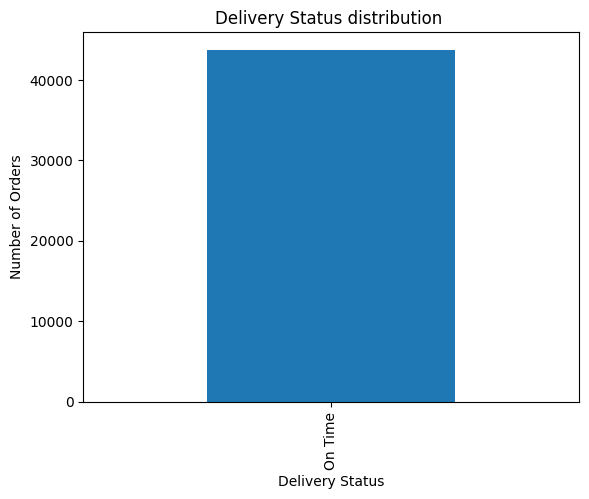

In [ ]:
#DELIVERY STATUS DISTRIBUTION
#Purpose: Overall performance snapshot
df['Delay_Flag'].value_counts().plot(kind='bar')
plt.title("Delivery Status distribution ")
plt.xlabel("Delivery Status")
plt.ylabel("Number of Orders")
plt.show()


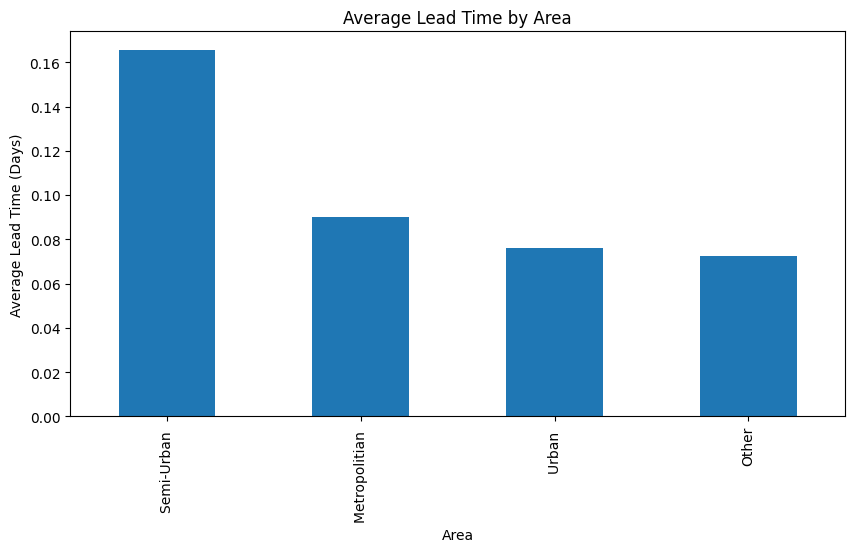

In [ ]:
#2️⃣ AVERAGE LEAD TIME BY WAREHOUSE (BOTTLENECK DETECTOR)
warehouse_lt = df.groupby('Area')['Lead_Time'].mean().sort_values(ascending=False)

warehouse_lt.plot(kind='bar', figsize=(10,5))
plt.title("Average Lead Time by Area")
plt.xlabel("Area")
plt.ylabel("Average Lead Time (Days)")
plt.show()

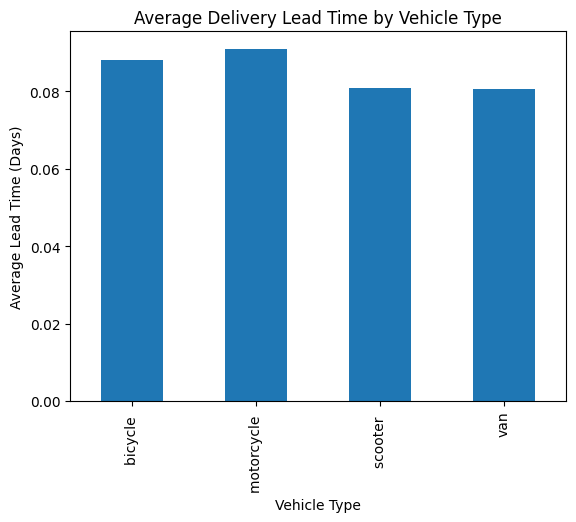

In [ ]:
#3️⃣ VEHICLE TYPE PERFORMANCE
vehicle_lt = df.groupby('Vehicle')['Lead_Time'].mean()

vehicle_lt.plot(kind='bar')
plt.title("Average Delivery Lead Time by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Lead Time (Days)")
plt.show()

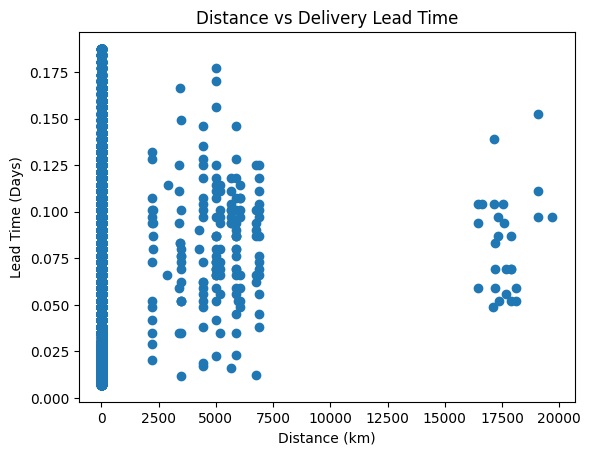

In [ ]:
#4️⃣ DISTANCE VS LEAD TIME (CORRELATION VIEW)
plt.scatter(df['Distance'], df['Lead_Time'])
plt.title("Distance vs Delivery Lead Time")
plt.xlabel("Distance (km)")
plt.ylabel("Lead Time (Days)")
plt.show()


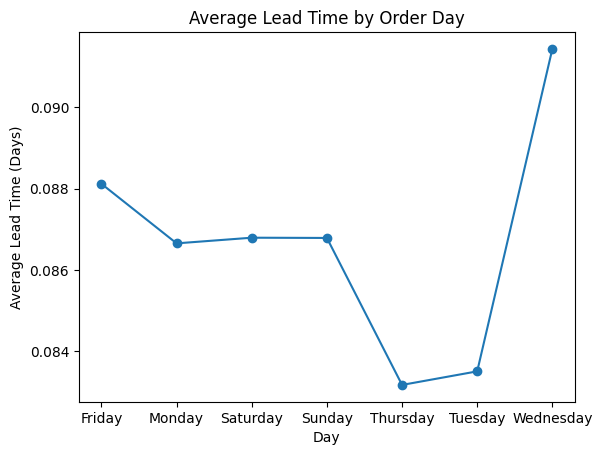

In [ ]:
#5️⃣ DAY-WISE DELIVERY BOTTLENECK
df['Order_Day'] = pd.to_datetime(df['Order_Date']).dt.day_name()

day_perf = df.groupby('Order_Day')['Lead_Time'].mean()

day_perf.plot(kind='line', marker='o')
plt.title("Average Lead Time by Order Day")
plt.xlabel("Day")
plt.ylabel("Average Lead Time (Days)")
plt.show()


In [ ]:
#6️⃣ DELAY COUNT BY WAREHOUSE (CRITICAL BOTTLENECKS)
delay_wh = df[df['Delay_Flag']=='Delayed'].groupby('Area').size().sort_values(ascending=False)

if not delay_wh.empty:
    delay_wh.plot(kind='bar', figsize=(10,5))
    plt.title("Delayed Deliveries by Area")
    plt.xlabel("Area")
    plt.ylabel("Number of Delays")
    plt.show()
else:
    print("No delayed deliveries found based on the current 'Delay_Flag' definition.")
    print("Consider adjusting 'expected_days' in an earlier cell to identify delays.")

No delayed deliveries found based on the current 'Delay_Flag' definition.
Consider adjusting 'expected_days' in an earlier cell to identify delays.


In [ ]:
#7️⃣ PARETO CHART
# Check if delay_wh is empty before proceeding
if not delay_wh.empty:
    delay_wh = delay_wh.reset_index()
    delay_wh.columns = ['Area', 'Delays'] # Renaming to 'Area' as per previous cells
    delay_wh['Cumulative_%'] = delay_wh['Delays'].cumsum() / delay_wh['Delays'].sum() * 100

    fig, ax1 = plt.subplots()

    ax1.bar(delay_wh['Area'], delay_wh['Delays'])
    ax2 = ax1.twinx()
    ax2.plot(delay_wh['Area'], delay_wh['Cumulative_%'], color='red', marker='o')

    ax1.set_xlabel("Area")
    ax1.set_ylabel("Number of Delays")
    ax2.set_ylabel("Cumulative Percentage")

    plt.title("Pareto Analysis of Delivery Delays")
    plt.show()
else:
    print("Cannot generate Pareto chart: No delayed deliveries found based on the current 'Delay_Flag' definition.")
    print("Consider adjusting 'expected_days' in an earlier cell to identify delays.")

Cannot generate Pareto chart: No delayed deliveries found based on the current 'Delay_Flag' definition.
Consider adjusting 'expected_days' in an earlier cell to identify delays.


In [ ]:
# Inspect columns to identify correct date fields

import pandas as pd
import zipfile
import os

zip_path = "/content/sample_data/amazon_delivery.csv.zip"
extract_path = "/mnt/data/amazon_delivery"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

csv_file = [f for f in os.listdir(extract_path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(extract_path, csv_file))

df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [ ]:
# Perform calculations based on correct columns and export cleaned data

import pandas as pd
import zipfile
import os

zip_path = "/content/sample_data/amazon_delivery.csv.zip"
extract_path = "/mnt/data/amazon_delivery"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

csv_file = [f for f in os.listdir(extract_path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(extract_path, csv_file))

# Convert date & time
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce')
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce')

# Delivery_Time is already the lead time (in minutes)
df['Lead_Time_Minutes'] = df['Delivery_Time']

# Define delay threshold using median
threshold = df['Lead_Time_Minutes'].median()

df['Delay_Flag'] = df['Lead_Time_Minutes'].apply(
    lambda x: 'Delayed' if x > threshold else 'On Time'
)

df['On_Time_Delivery'] = df['Delay_Flag'].apply(lambda x: 1 if x == 'On Time' else 0)

# Export final dataset
csv_out = "/mnt/data/amazon_delivery_after_calculations.csv"
xlsx_out = "/mnt/data/amazon_delivery_after_calculations.xlsx"

df.to_csv(csv_out, index=False)
df.to_excel(xlsx_out, index=False)

(csv_out, xlsx_out)

('/mnt/data/amazon_delivery_after_calculations.csv',
 '/mnt/data/amazon_delivery_after_calculations.xlsx')